   **What is outliers ?**

        Data entries error
        Measurement errors or instrument errors
        Sampling errors
        Data processing errors
        Natural novelties in data

**Types of Outliers?**

  **Univariate Outliers**                                

         generally referred to as extreme points on a variable    
         (one column)

   **Multivariate Outliers**
    
         generally combination of unusual data points for two or more variables


**How can you find outlier data ?**

    Graphs

    Interquartile range (IQR) Technique

    Statistical Test

**Interquartile range (IQR) Technique**

    Datayı çeyreklere bölüyor ve datanın %50 ya da %25 ine göre bir analiz yapıp outlier verilerin olduğu alanları tesbit ettiriyor

    Ekstreme değerlere outlier diyemeyiz. 
    
    Ekstreme değerleri belirledikten sonra domain bilgisine göre outlier değerleri belirleriz
    


 ***Methods for handling outliers***
 
 1.) Removing the outliers
 
 2.) Limitation the outliers
 
 3.) Data transformation
 
 4.) Replacing the outliers
 
 5.) Using different analysis methods
 
 6.) Valuing the outliers

**Not :** Limitation outlier yöntemi bir çeşit sıkıştırma yöntemidir. Yani bir önceki ya da bir sonraki veri alınır
        ve herhangi birinin değeri verilir. Ama bu datanızı manipüle etmenize yol açar. Sağlıklı sonuçlar doğurmayabilir.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Catching and Detecting Outliers

In [4]:
sns.get_dataset_names()

#seaborn un içerisinde bulunan çeşitli datasetler

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset("diamonds")

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#bu aşamada bize sadece sayısal veriler lazım select_dtypes include=number dediğimizde sadece sayısal verileri getirir

df.select_dtypes(include="number")

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
df.select_dtypes(include="float")

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [13]:
#sadece sayısal verileri çalışacağımız için df e eşitleme yapabiliriz

df=df.select_dtypes(include="number")
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
df.info()

#herhangi bir null değerimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


**info about dataset**

    carat :Carat weight of the diamond
    depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
    table % :The width of the diamond's table expressed as a percentage of its average diameter
    price :the price of the diamond
    x :length mm
    y :width mm
    z :higth mm

**Detecting Outliers with Graphs**

In [ ]:
#ilk önce görselleştirme yapmamaız gerekir

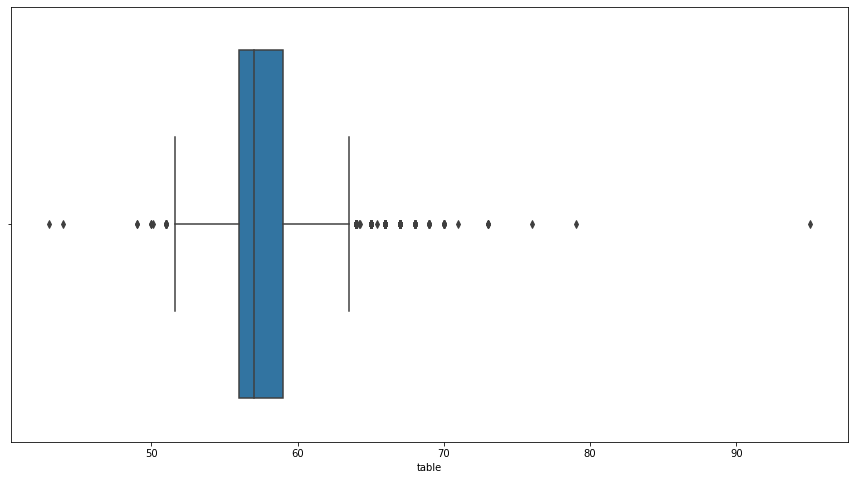

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.table);

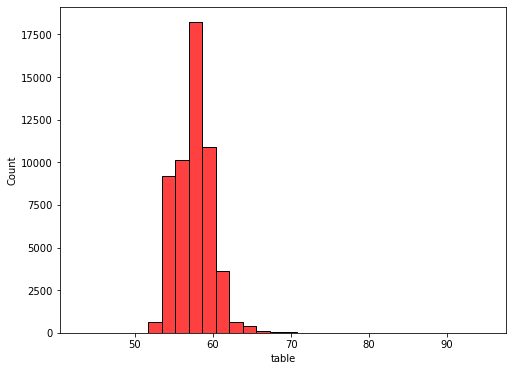

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df.table , bins=30 , kde=False, color="red");

In [30]:
df.table.sort_values()

#ekstreme değerleri görebiliyorz

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [34]:
 df.table.sort_values().tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [36]:
tail_index= df.table.sort_values().tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [37]:
df.loc[tail_index]

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


# Detecting Outliers with Tukey's Fences | Tukey's Rule

**First way** of specifying **Q1 & Q3** is using the **.quantile()** method

In [43]:
Q1=df.table.quantile(0.25)

#baştan 25. indexe denk gelen 56 imiş (ya da %25 inci indexe denk gelen)

In [44]:
Q3=df.table.quantile(0.75)

In [46]:
IQR = Q3 - Q1
IQR

3.0

**Second way** of specifying **Q1 & Q3** is using the **.describe()** method

In [47]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [49]:
Q1 = df.table.describe().loc["25%"]
Q3 = df.table.describe().loc["75%"]
IQR = Q3 - Q1
IQR

3.0

In [50]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim , upper_lim

(51.5, 63.5)

In [51]:
#upper vve lower ın altında kaç tane terim var

(df.table < lower_lim).sum()

16

In [52]:
(df.table > upper_lim).sum()

589

In [54]:
((df.table < lower_lim) | (df.table > upper_lim)).sum()

#total extreme değer

605

# Removing the Outliers

örneğin tesbit ettiğimiz ekstreme değerler outlier ve biz bunları nasıl drop ederiz 

In [63]:
drop_index= df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
drop_index



Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [60]:
df.loc[~((df.table < lower_lim) | (df.table > upper_lim))].index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939],
           dtype='int64', length=53335)

In [61]:
df.loc[~((df.table < lower_lim) | (df.table > upper_lim))]

#605 tane olan outlierların atıldığı dataframe i veriyor

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [62]:
df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))]
df_cleaned

#ilk yöntem
#ekstreme değerlerin olmadığı (~) kısımları alıp yeni bir df içine satadık bu sayede outlierlardan kurtulduk (yukarıdaki satırdaki gibi)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [64]:
df.drop(drop_index, axis=0)

#ikinci yöntem
#drop_index i yukarıda belirlemiştik. outlier olan değerlerin indexlerşini drop index e atadı ve drop methodu ile de 
#drop index değerlerinden yani outlier değerler den kurtulmuş oldu

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='table'>

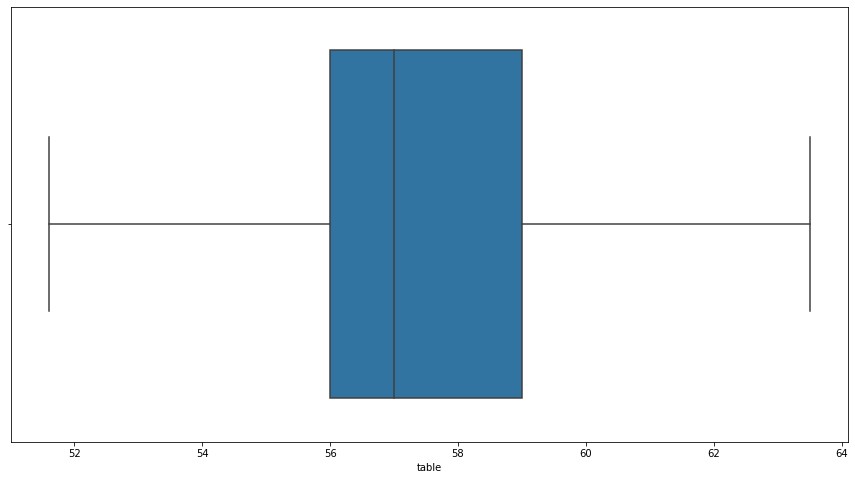

In [65]:
#box plota bakalım

plt.figure(figsize=(15,8))
sns.boxplot(x=df_cleaned.table)

<AxesSubplot:xlabel='table', ylabel='Count'>

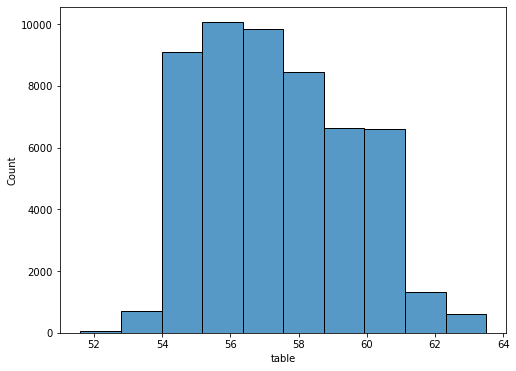

In [67]:
#histogram a bakalım

plt.figure(figsize=(8,6))
sns.histplot(x=df_cleaned.table , bins=10 , kde=False)

In [68]:
df_cleaned.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [69]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [71]:
compare = pd.DataFrame(df.table.describe().values, columns = ["first"])
compare

,first
0,53940.000000
1,57.457184
2,2.234491
3,43.000000
4,56.000000
5,57.000000
6,59.000000
7,95.000000


In [72]:
compare = pd.DataFrame(df.table.describe().values, index= df.table.describe().index, columns = ["first"])
compare

,first
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


In [73]:
compare = pd.DataFrame(df.table.describe().values, index= df.table.describe().index, columns = ["first"])
compare["second"]=df_cleaned.table.describe().values
compare

,first,second
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [76]:
pd.DataFrame([df.table.describe(), df_cleaned.table.describe()], index=['first', 'second']).T

,first,second
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


# Limitation & Transformation of the Outliers

In [77]:
from scipy.stats.mstats import winsorize

In [78]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [79]:
winsorize(df.table, (0.02, 0.05))

#winsorize yaptıktan sonra (sıkıştırma yaptıktan sonra) değerlerin bu şekilde olur

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [80]:
a = len(df.table[df.table < lower_lim])/len(df)

In [81]:
a

0.00029662588060808305

In [82]:
b = len(df.table[df.table > upper_lim]) / len(df.table)
b

0.010919540229885057

In [85]:
table_win = winsorize(df.table, (a,b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

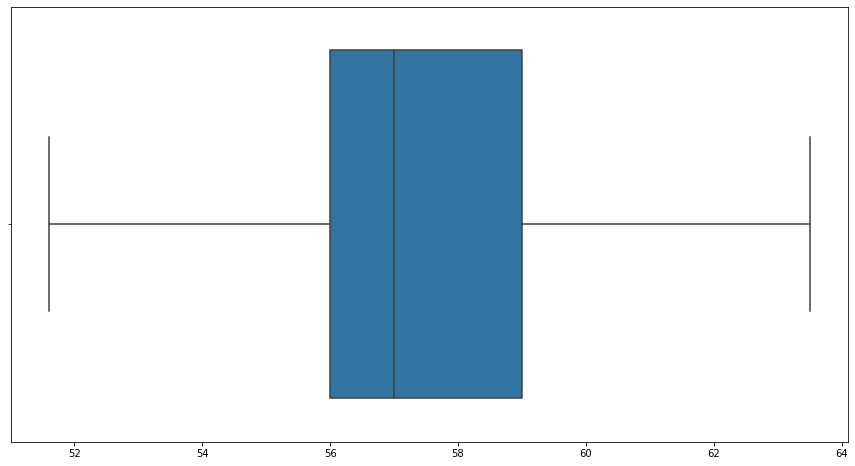

In [86]:
plt.figure(figsize=(15,8))
sns.boxplot(x=table_win);

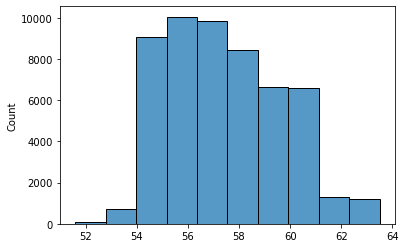

In [87]:

sns.histplot(table_win , bins=10 , kde=False);

In [89]:
table_win_ser=pd.Series(table_win)
table_win_ser

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [93]:
pd.DataFrame([df.table.describe(), table_win_ser.describe()], index=["first","second"]).T

,first,second
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [94]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [96]:
table_win_ser.sort_values().head(20)

#51.6 dan küçük olan değerlerin hepsini 51.6 ya tamamlamış

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [97]:
table_win_ser[table_win_ser == 51.6].count()

17

In [98]:
table_win_ser[table_win_ser == 63.5].count()

590

**Transformation using log() method**

In [99]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [100]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

C:\Users\asus\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


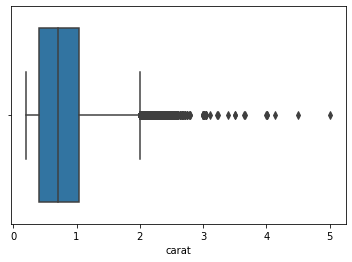

In [102]:
sns.boxplot(df.carat);

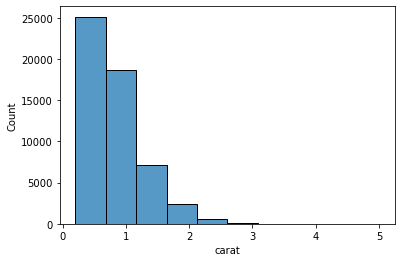

In [104]:
sns.histplot(df.carat, bins=10, kde=False);

In [109]:
carat_log = np.log(df.carat)

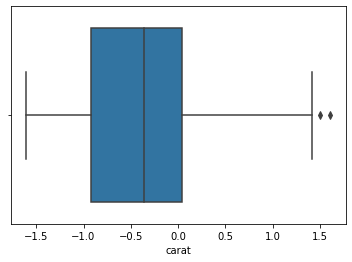

In [110]:
sns.boxplot( x = carat_log);

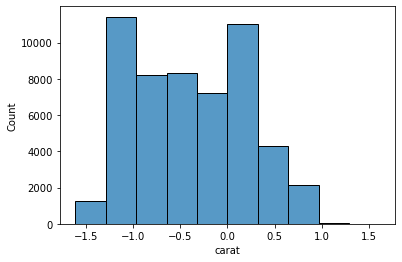

In [112]:
sns.histplot(carat_log , bins=10, kde=False);

In [116]:
df["carat_log"] = np.log(df.carat)
df

<ipython-input-116-ccff22496841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["carat_log"] = np.log(df.carat)


,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**Removing outliers after log() transformation**


**first method to remove outliers**

In [119]:
df.carat_log.sort_values().tail()

25999    1.388791
25998    1.388791
27130    1.418277
27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [120]:
drop_index= df.carat_log.sort_values().tail(2).index
drop_index

Int64Index([27630, 27415], dtype='int64')

In [121]:
df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**second method to remove outliers**

In [122]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)

IQR = Q3 -Q1

IQR

0.9555114450274363

In [123]:
lower_lim = Q1- 1.5*IQR
upper_lim = Q3 + 1.5*IQR

IQR = Q3 - Q1
IQR

0.9555114450274363

In [124]:
(df.carat_log > upper_lim).sum()

2

In [128]:
(df.carat_log <= lower_lim).sum()

0

In [130]:
df.loc[(df.carat_log > upper_lim)].T

,27415,27630
carat,5.010000,4.500000
depth,65.500000,65.800000
table,59.000000,58.000000
price,18018.000000,18531.000000
x,10.740000,10.230000
y,10.540000,10.160000
z,6.980000,6.720000
carat_log,1.611436,1.504077


In [131]:
drop_index = df.loc[(df.carat_log > upper_lim)].index
drop_index

Int64Index([27415, 27630], dtype='int64')

In [132]:
df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**third method to remove outliers**

In [134]:
not_outliers = (df.carat_log <= upper_lim)

In [135]:
len(df[not_outliers])

53938

In [136]:
cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823
